In [24]:
import numpy as np
from scipy.interpolate import CubicSpline
import GraphPlot as gp
import numpy as np
import os

def blend_zeros(arr1):
    arr = np.copy(arr1)
    arg_max = np.argmax(arr)
    i = 0
    while arr[i] == 0: i+=1
    while i < arg_max:
        if arr[i] == 0:
            arr[i] = arr[i-1]
            arr[-i-1] = arr[-i]
        i += 1
    return arr

def remove_zeros(arr1, *args):
    # Create a list to store indices of 0 values in arr1
    zero_indices = []
    i = 0
    while arr1[i] == 0: i+=1
    b1 = i
    b2 = len(arr1)-i
    # Find indices of 0 values in arr1
    for i, value in enumerate(arr1[b1:b2]):
        if value == 0:
            zero_indices.append(i+b1)

    # Remove elements at the zero_indices from all arrays
    filtered_arrays = [np.delete(arr1, zero_indices)]
    filtered_arrays += [np.delete(arr, zero_indices) for arr in args]

    return tuple(filtered_arrays)

def interpolate_data(x_data, y_data, x_interpolation):
    # Create the cubic spline object using the given data points
    cs = CubicSpline(x_data, y_data)

    # Generate the interpolated points using the provided x_interpolation
    y_interpolated = cs(x_interpolation)

    return x_interpolation, y_interpolated

def moving_average(data, window_size = 3):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

[0, 0.9244709065282642, 4.132340683956458, 9.976888812964539, 18.591267526136928, 30.03905627963785, 44.316256997213856, 61.41234607235024, 81.25239372984026, 103.75958899966612]


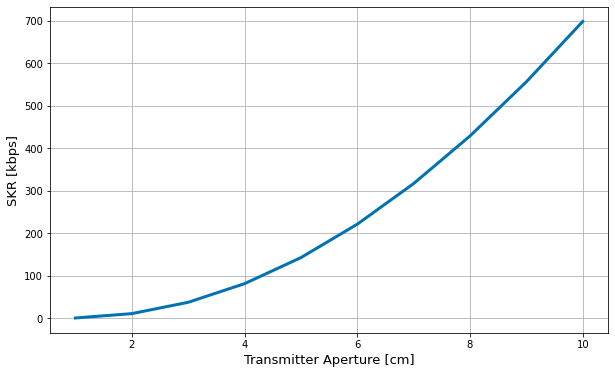

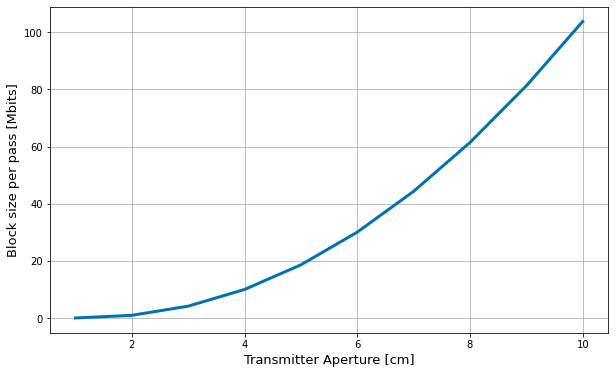

In [28]:
def group(range,end):
    name = [str(r)+end for r in range]
    skl = []
    for n in name:
        data = np.loadtxt(os.path.join(dir,'sims',n),delimiter=',',skiprows=2)
        skl.append(data[:,5])
    return skl

def group_erase(t,skl):
    l1 = []
    t1   = []
    for l in skl:
        aux_skl, aux_t = remove_zeros(l,t)
        l1.append(aux_skl)
        t1.append(aux_t)
    return t1,l1

nloss = 'FS_loss_th_m_90.00_wl_850nm_h_500.0km_h1_0.0km_aT_0.04m_aR_0.7m_w0_0.02m.csv'
dl   = np.loadtxt(os.path.join(dir,nloss),delimiter=',')
plt = gp.plot()
plt.default_settings.Grid(True)

t = dl[:,0]
r = [1,2,3,4,5,6,7,8,9,10]
l = group(r,'cm.csv')
zenith = [np.max(l1)*10**-3 for l1 in l]
t_er, l_er = group_erase(t,l[1:])
block = [0]
for i in range(len(l_er)):
    aux_sum = 0
    for j in range(len(l_er[i])):
        if j < len(l_er)-1:
            aux_sum += l_er[i][j]*np.abs(t_er[i][j]-t_er[i][j+1])
        else:
            aux_sum += l_er[i][j]*np.abs(t_er[i][j]-t_er[i][j-1])
    block.append(aux_sum*10**-6)

print(block)

plt.add_data(r,zenith)
plt.y_legend("SKR [kbps]")
plt.x_legend("Transmitter Aperture [cm]")
plt.title(None)
plt.plot()
plt.pop_all()
plt.add_data(r,block)
plt.y_legend("Block size per pass [Mbits]")
plt.x_legend("Transmitter Aperture [cm]")
plt.title(None)
plt.plot()


In [39]:
nsim = '3S1D_Params_03.csv'
#nsim = 'out_th_m_90.00_Pec_1e-08_QBERI_0.001.csv'
nloss = 'FS_loss_th_m_90.00_wl_850nm_h_500.0km_h1_0.0km_aT_0.04m_aR_0.7m_w0_0.02m.csv'
dir  = os.path.dirname(os.getcwd())
dl   = np.loadtxt(os.path.join(dir,nloss),delimiter=',')
data = np.loadtxt(os.path.join(dir,'sims',nsim),delimiter=',',skiprows=2)
#data = np.loadtxt(os.path.join(dir,nsim),delimiter=',',skiprows=2)

# dt (s),ls (dB),QBERI,Pec,maxElev (deg),SKL (b),QBER,phiX,nX,nZ,mX,lambdaEC,sX0,sX1,vZ1,sZ1,mean photon no.,PxA,PxB,P1,P2,P3,mu1,mu2,mu3,eps_c,eps_s,Pap,NoPass,fs (Hz),minElev (deg),shiftElev (deg),SysLoss (dB)

t    = dl[:,0]              # Time [s]
dt   = data[:,0]            # Time window (delta) [s]
elev = np.degrees(dl[:,1])  # Elevation [deg]
loss = data[:,31]           # Loss [dB]
tot  = dl[:,2]
dif  = dl[:,3]
atm  = dl[:,4]
intr = dl[:,5]
SKL  = data[:,5]            # Secret Key Lenght [bits]
QBER = data[:,6]            # Quantum Bit Error Rate [%]
phiX = data[:,7]            # Error Phase
PAx  = data[:,17]           # Alice's asymmetric basis choice probability
PBx  = data[:,18]           # Bob's asymmetric basis choice probability
P1   = data[:,19]           # Probability of preparing WCP intensity 1
P2   = data[:,20]           # Probability of preparing WCP intensity 2
I1   = data[:,21]           # WCP intensity 1
I2   = data[:,22]           # WCP intensity 2
I3   = data[:,23]           # WCP intensity 3


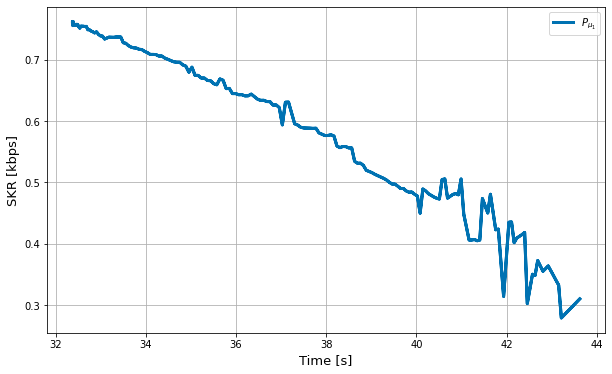

In [42]:
plt = gp.plot()
plt.default_settings.Grid(True)
skl = np.array([n*10**-3 for n in SKL])
qber = np.array([n*100 for n in QBER])
aux_skl, aux_t, aux_q, aux_elev, aux_loss,aux_pax,aux_p1,aux_p2,aux_mu1,aux_mu2 = remove_zeros(skl,t,qber,elev,-10*np.log10(tot),PAx,P1,P2,I1,I2)
i=0
while aux_skl[i] == 0: i+=1
b1 = i
b2 = len(aux_skl)-i
n = 0
#plt.add_data(aux_t,aux_skl)
#plt.add_twindata(aux_t, aux_q, style='r')
#plt.add_data(t,loss)
plt.add_data(aux_loss[b1:b2+n],aux_p1[b1:b2+n],label='$P_{\mu_1}$')
#plt.add_data(aux_loss[b1:b2+n],aux_p2[b1:b2+n],label='$P_{\mu_2}$')
#plt.add_data(aux_loss[b1:b2+n],aux_mu1[b1:b2+n],label='$\mu_1$')
#plt.add_data(aux_loss[b1:b2+n],aux_mu2[b1:b2+n],label='$\mu_2$')
#x_int, y_int = interpolate_data(aux_t[::-1],aux_skl,np.linspace(aux_t[-1],aux_t[0],1000))
#plt.add_data(x_int,moving_average(y_int))
plt.y_legend("SKR [kbps]")
plt.x_legend("Time [s]")
plt.ytwin_legend("QBER [%]")
plt.title(None)
plt.plot()

4.2151553927223924e-08
73.7518641037307


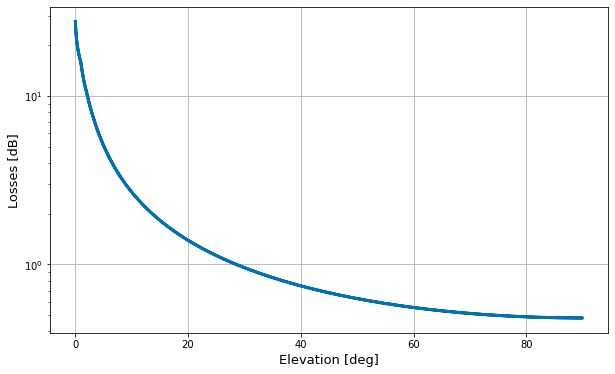

In [17]:
plt = gp.plot()
plt.default_settings.Grid(True)
db_atm = np.amin(tot)
#N = 1/np.amin(db_atm)
plt.add_data(elev,-10*np.log10(atm))
# plt.add_data(elev,-10*np.log10(dif),label='Diffraction')
# plt.add_data(elev,-10*np.log10(atm),label='Atmospheric')
# plt.add_data(elev,-10*np.log10(intr),label='Intrinsic')
#plt.add_data(t,-10*np.log10(tot))
plt.y_legend("Losses [dB]")
plt.x_legend("Elevation [deg]")
plt.title(None)
plt.logplot()

In [73]:
a = [1,2,3,4]
a[1:3]


[2, 3]

In [25]:
def calculate_zeros(arr):
    total_elements = len(arr)
    zero_count = arr.count(0)
    zero_percentage = (zero_count / total_elements) * 100
    zero_indices = [index for index, value in enumerate(arr) if value == 0]
    return zero_percentage, zero_indices

def find_matches(*arrays):
    # Find common numbers in all arrays
    common_numbers = set.intersection(*map(set, arrays))

    # Calculate the number of matches for each common number
    matches_count = len(common_numbers)

    # Calculate the percentage of matches for each common number
    total_arrays = len(arrays[0])
    percentage_matches = (matches_count/total_arrays)*100

    return percentage_matches, common_numbers

def cut_array(arr):
    # Find the first non-zero index from the beginning
    start_index = 0
    while start_index < len(arr) and arr[start_index] == 0:
        start_index += 1

    # Find the first non-zero index from the end
    end_index = len(arr) - 1
    while end_index >= 0 and arr[end_index] == 0:
        end_index -= 1

    # Cut the original array between the non-zero indices
    cut_array = arr[start_index:end_index+1]

    return cut_array,start_index,end_index


In [26]:
s,i,e = cut_array([n*10**-3 for n in SKL])

In [33]:
l = [n*10**-3 for n in SKL]
s = l[i:e]
zeros,A2 = calculate_zeros(s)
print('Ratio of Zeros: {} %'.format(zeros))

Ratio of Zeros: 42.30769230769231 %


In [34]:
m = None
m,match = find_matches(A1,A2)
print('Ratio of Zeros: {} %'.format(m))
print('Matches: ',match)

Ratio of Zeros: 54.36893203883495 %
Matches:  {256, 1, 2, 3, 4, 5, 6, 257, 8, 258, 259, 11, 14, 15, 17, 18, 19, 20, 21, 23, 25, 29, 31, 32, 35, 42, 43, 47, 176, 55, 57, 60, 200, 203, 205, 84, 213, 217, 218, 225, 228, 229, 231, 235, 237, 239, 240, 241, 242, 243, 245, 246, 249, 252, 254, 255}


In [44]:
def cut_arrays(Array1,Array2):
    zipp = zip(Array1,Array2)
    Arr = list(sorted(zipp, key=lambda x: x[0]))
    inds = []
    for i in range(1,len(Arr)):
        if Arr[i][0] == Arr[i-1][0]:
            inds += [i]
    Filter = [value for index, value in enumerate(Arr) if index not in inds]
    Ar1, Ar2 = zip(*Filter)

    return np.array(Ar1[::-1]) , np.array(Ar2[::-1])


ar = [2,4,6,8,10,1,3,5,7,9]
arx = [1,1,1,1,1,1,1,1,1,1]
r1,r2 = cut_arrays(ar,arx)
print(r1)
print(r2)

[10  9  8  7  6  5  4  3  2  1]
[1 1 1 1 1 1 1 1 1 1]
